# Generate Choice file for all participants (pet experiment)


In [71]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
# Useful to quickly extract csv files
import glob
import os

In [72]:
# Extract Rate data

In [73]:
# Load data all participants

choiceNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
rateNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
rateNameFrames.sort()
choiceNameFrames.sort()

In [74]:
choiceNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_5.csv']

In [75]:
rateNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/S01/S01_RateData_PFT_RateChoice_MRI_Exp_5.csv']

## Join rating in this case

### ** Only for participant 1 (first scanner pilot) problem in even sessions , the rating appears flipped (1 when it should be 4 and viceversa), should be corrected (5 - originalRating = realRating) .

In [88]:
partic_num=len(rateNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameRawAll = pd.DataFrame( )

for j in range (partic_num):
    rateFrames = pd.read_csv(rateNameFrames[j])
    choiceFrames = pd.read_csv(choiceNameFrames[j]) 
    
   # print (rateFrames.rating)
    
    if 'ratL' in choiceFrames.columns:
        if 'ratR' in choiceFrames.columns:
            choiceFrames = choiceFrames.drop(['ratL', 'ratR'], axis=1)
   
    partNamesRate = [int(os.path.basename(choiceNameFrames[j])[1:3])]*len(rateFrames)
    partNamesChoice = [int(os.path.basename(rateNameFrames[j])[1:3])]*len(choiceFrames)

    sessionRate = [int(os.path.basename(choiceNameFrames[j])[-5])]*len(rateFrames)
    sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    
    rateFrames['part'] = partNamesRate 
    choiceFrames['part'] = partNamesChoice 

    rateFrames['session'] = sessionRate 
    choiceFrames['session'] = sessionChoice 

    
    # to fix rating in wrong participant
    if np.unique(partNamesRate) == 1 and np.unique(sessionRate)[0]%2 == 1: # participant 1 is the conflictive one.
        ratingFixed = 5 - rateFrames.rating.values
        rateFrames['rating'] = [-1 if x==6 else x for x in ratingFixed]
        print('into')

        
 #   print (rateFrames.rating)

        
    choiceFrameRawAll = pd.concat([choiceFrameRawAll,choiceFrames],ignore_index=True)
    rateFrameRawAll = pd.concat([rateFrameRawAll,rateFrames],ignore_index=True)

into
into
into


In [89]:
data_expL = rateFrameRawAll.loc[(rateFrameRawAll['frame'] == 1)] # 1 = Like, 2 = Dislike

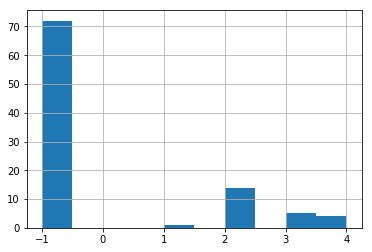

In [90]:
data_expL.rating.hist()

In [91]:
choiceFrameAll = pd.DataFrame( columns = ['trial','leftId','rightId','frame','endTime','choice','choiceTime','LRat1','RRat1','LRat2','RRat2','LVar1','RVar1','LVar2','RVar2','Part'])
idFrameAll = pd.DataFrame( columns = ['nameId','rat1','rat2','var1','var2','Part'])

In [92]:
for j in list (choiceFrameRawAll.part.unique()):
    
    idNames = list(rateFrameRawAll.picId.unique())
    IdRatings1 = [None]*len(idNames)
    IdRatings2 = [None]*len(idNames)
    IdRatingsVar1 = [None]*len(idNames)
    IdRatingsVar2 = [None]*len(idNames)

    #extract average rating for like, dislike
    for i in range(len(idNames)):
        IdRatings1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        IdRatings2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()

        IdRatingsVar1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()
        IdRatingsVar2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()
    
    rateValues = pd.DataFrame( {'nameId': idNames,'rat1': IdRatings1,'rat2': IdRatings2,'var1': IdRatingsVar1,'var2': IdRatingsVar2,})
    rateValues['Part'] = [j]*len(rateValues)    
    
    # save information about celebs and ratings
    
    idFrameAll = pd.concat([idFrameAll,rateValues],ignore_index=True)
    
    choiceFrames = choiceFrameRawAll.loc[ (rateFrameRawAll['part'] == j)]
    
    # separate ratings and rating-variability for each frame
    ChoiceLRat1 = [None]*len(choiceFrames)
    ChoiceRRat1 = [None]*len(choiceFrames)
    ChoiceLRat2 = [None]*len(choiceFrames)
    ChoiceRRat2 = [None]*len(choiceFrames)

    ChoiceLVar1 = [None]*len(choiceFrames)
    ChoiceRVar1 = [None]*len(choiceFrames)
    ChoiceLVar2 = [None]*len(choiceFrames)
    ChoiceRVar2 = [None]*len(choiceFrames)
    
    for i in range(len(choiceFrames)):
        
        choiceL = choiceFrames.iloc[i].leftId
        choiceR = choiceFrames.iloc[i].rightId
        
        if any((rateValues['nameId'] == choiceL)) and any((rateValues['nameId'] == choiceR)):
        
            ChoiceLRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat1.values[0]
            ChoiceRRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat1.values[0]
            ChoiceLRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat2.values[0]
            ChoiceRRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat2.values[0]
            
            ChoiceLVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var1.values[0]
            ChoiceRVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var1.values[0]
            ChoiceLVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var2.values[0]
            ChoiceRVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var2.values[0]

    choiceFrames['LRat1'] = ChoiceLRat1
    choiceFrames['RRat1'] = ChoiceRRat1
    choiceFrames['LRat2'] = ChoiceLRat2
    choiceFrames['RRat2'] = ChoiceRRat2 
    
    choiceFrames['LVar1'] = ChoiceLVar1
    choiceFrames['RVar1'] = ChoiceRVar1
    choiceFrames['LVar2'] = ChoiceLVar2
    choiceFrames['RVar2'] = ChoiceRVar2
     
    choiceFrames['Part'] = [j]*len(choiceFrames)    

    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)
    

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# Save file

In [93]:
idFrameAll

,nameId,rat1,rat2,var1,var2,Part
0,2.0,2.500000,2.333333,0.836660,0.836660,1
1,5.0,2.000000,2.500000,0.000000,0.000000,1
2,6.0,2.166667,2.500000,0.752773,0.752773,1
3,1.0,3.333333,1.666667,0.816497,0.816497,1


In [94]:
choiceFrameAll

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
0,2.500000,2.333333,0.836660,0.836660,1,3.333333,1.666667,0.816497,0.816497,1.0,...,1.0,0.0,0.0,10.008441,143.077966,0.009619,3.503595,1.023621,1.523994,3.503366
1,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.836660,-1.0,...,2.0,0.0,1.0,11.009513,153.087441,0.009057,3.502708,1.032679,1.532957,3.502486
2,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.836660,1.0,...,2.0,0.0,2.0,10.006834,164.098005,0.009079,3.501757,1.022719,1.523898,3.501520
3,2.000000,2.500000,0.000000,0.000000,1,3.333333,1.666667,0.816497,0.816497,-1.0,...,1.0,0.0,3.0,12.009805,174.106030,0.009285,3.502460,1.033354,1.534430,3.502239
4,3.333333,1.666667,0.816497,0.816497,1,2.000000,2.500000,0.000000,0.000000,-1.0,...,5.0,0.0,4.0,10.008921,192.637473,0.009233,3.503843,1.034660,1.535800,3.503632
5,2.500000,2.333333,0.836660,0.836660,1,2.166667,2.500000,0.752773,0.752773,1.0,...,6.0,0.0,5.0,12.013349,202.647474,0.009394,3.502394,1.028146,1.529312,3.502148
6,2.500000,2.333333,0.836660,0.836660,1,3.333333,1.666667,0.816497,0.816497,-1.0,...,1.0,0.0,6.0,11.001328,219.678266,0.008916,3.502425,1.032876,1.533299,3.502200
7,2.500000,2.333333,0.836660,0.836660,1,2.000000,2.500000,0.000000,0.000000,1.0,...,5.0,0.0,7.0,10.008696,241.213399,0.009753,3.503389,1.033124,1.534266,3.503173
8,2.166667,2.500000,0.752773,0.752773,1,2.000000,2.500000,0.000000,0.000000,1.0,...,5.0,0.0,8.0,11.008697,264.267688,0.010293,3.501765,1.032259,1.533323,3.501530
9,2.166667,2.500000,0.752773,0.752773,1,2.500000,2.333333,0.836660,0.836660,-1.0,...,2.0,0.0,9.0,12.008782,275.277436,0.008549,3.501993,1.023823,1.524562,3.501752


In [97]:
choiceFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All/PFT_Choice_ScanPilot_All.csv',index = False)
idFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All/PFT_idRatingsFrame_ScanPilot_All.csv',index = False)